In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat

# from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Flatten, Dense, Reshape
from tensorflow.keras import losses, utils
from tensorflow.keras.models import Model

Data pre-processing:

In [ ]:
file = loadmat('/content/drive/MyDrive/spike_data.mat')
data = file['wf']
data_concat = data[0][0]
for i in range(0, 96):
  for j in range(0, 5):
    if not(i==0 and j==0):
      data_concat = np.append(data_concat, data[i][j], axis=0)

x_train_raw, x_test_raw = train_test_split(data_concat, test_size=0.3)
x_train_raw = x_train_raw.astype('float32')
x_test_raw = x_test_raw.astype('float32')

In [ ]:
x_train = utils.normalize(x_train_raw, axis=0)
x_test = utils.normalize(x_test_raw, axis=0)

Model:

In [ ]:
def build():
  raw_data = Input(shape=64)

  # Encoder
  encoded = Dense(2, activation='relu')(raw_data)

  # Decoder
  decoded = Dense(64, activation='sigmoid')(encoded)

  model = tf.keras.Model(inputs=raw_data, outputs=decoded)

  return model


autoencoder = build()

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                192       
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


Train:

In [ ]:
autoencoder.fit(x_train, x_train,
                batch_size=320,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Epoch 1/10
1788/1788 [==============================] - 4s 2ms/step - loss: 0.0533 - val_loss: 0.0012
Epoch 2/10
1788/1788 [==============================] - 3s 2ms/step - loss: 4.9655e-04 - val_loss: 1.7051e-04
Epoch 3/10
1788/1788 [==============================] - 3s 2ms/step - loss: 9.9315e-05 - val_loss: 4.8222e-05
Epoch 4/10
1788/1788 [==============================] - 3s 2ms/step - loss: 3.0431e-05 - val_loss: 1.7999e-05
Epoch 5/10
1788/1788 [==============================] - 3s 2ms/step - loss: 1.1276e-05 - val_loss: 8.7088e-06
Epoch 6/10
1788/1788 [==============================] - 3s 2ms/step - loss: 5.0457e-06 - val_loss: 5.5996e-06
Epoch 7/10
1788/1788 [==============================] - 3s 2ms/step - loss: 2.8856e-06 - val_loss: 4.5258e-06
Epoch 8/10
1788/1788 [==============================] - 3s 2ms/step - loss: 2.1168e-06 - val_loss: 4.1538e-06
Epoch 9/10
1788/1788 [==============================] - 3s 2ms/step - loss: 1.8405e-06 - val_loss: 4.0257e-06
Epoch 10/10
1788/1

In [ ]:
x_predict = autoencoder.predict(x_test)

Plot:

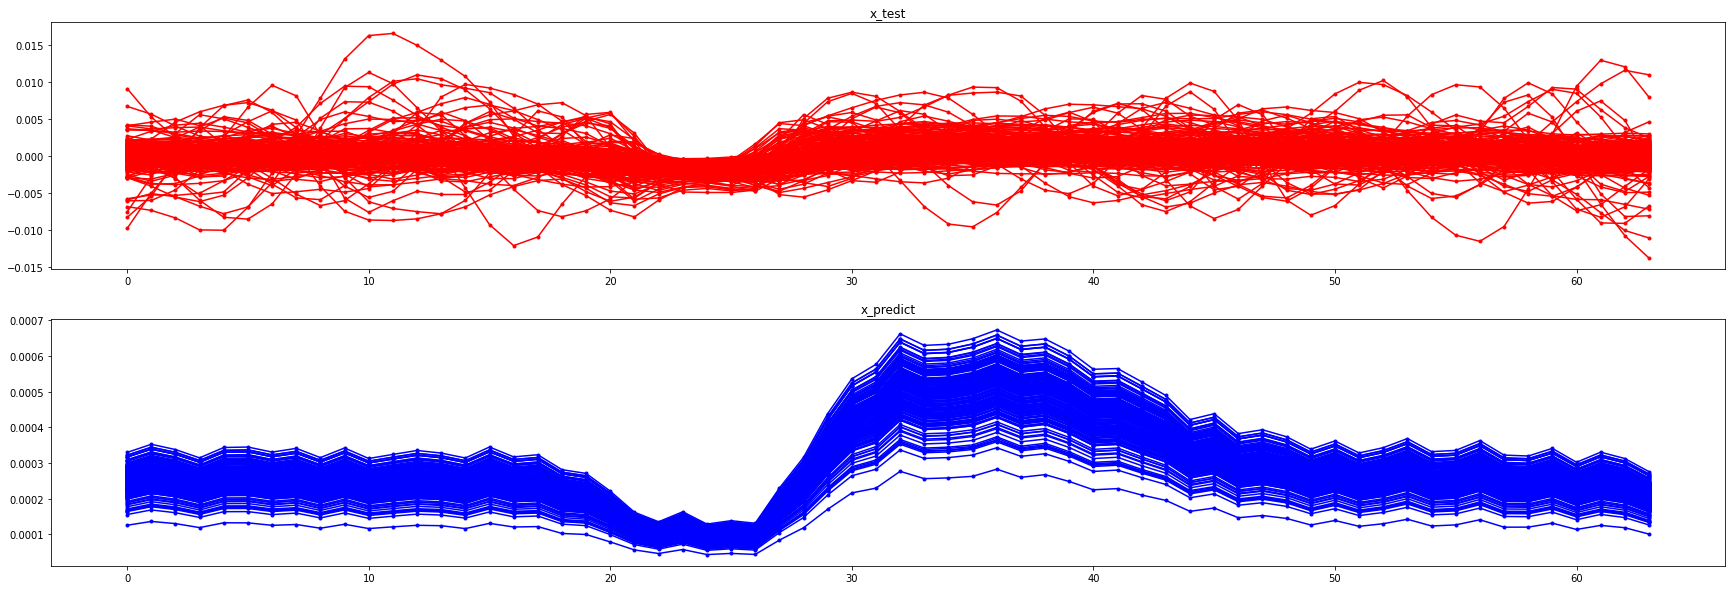

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('x_test')
ax2.set_title('x_predict')

x = np.arange(0, 64)
for i in range(200):
  y1 = x_test[i]
  y2 = x_predict[i]
  ax1.plot(x, y1, c = 'r', marker = '.')
  ax2.plot(x, y2, c = 'b', marker = '.')

plt.show()